<h1 align="center">Experiment No. 14</h1>
<hr>

<p style="font-size:20px;"><i>$$Write\ a\ program\ to\ find\ the\ magnitude\ and\ phase\ response\ of\ first\ order\ low\ pass\ and\ high\ pass\ filter.\ Plot\ the\ responses\ in\ logarithmic\ scale.$$</i></p>
<hr>

<p style="font-size:20px">Import libraries and plot setup.</p>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy import sin, cos, pi, exp
from scipy.signal import butter, freqz
from scipy.integrate import simps as intgrt
from pylab import *

In [2]:
def getReadySubplot(signals,title = 'Multiple Signal in subplot.', figSize=None):
    numOfPlot = len(signals)
    fig, axes = plt.subplots(numOfPlot, 1) 
    if figSize != None:
        fig.set_size_inches(figSize[0], figSize[1])
    fig.suptitle(title, fontsize=20, y=0.93)
    for index in range(numOfPlot):
        if signals[index]['isDiscrete'] == True:
            axes[index].stem(signals[index]['x'],signals[index]['y'])
        else:
            axes[index].plot(signals[index]['x'],signals[index]['y'])
        axes[index].set_title(signals[index]['title'])
        axes[index].set_xlabel(signals[index]['xlabel'])
        axes[index].set_ylabel(signals[index]['ylabel'])

<p style="font-size:20px">Impliment Butter Filter.</p>

In [3]:
order = 6
fs = 30.0       
cutoff = 3.667  

def butterFilter(cutoff, fs, filterType, order=5):
    nyq = 0.5 * fs
    normalCutoff = cutoff / nyq
    b, a = butter(order, normalCutoff, btype=filterType, analog=False)
    return b, a

<p style="font-size:20px">Impliment Low Pass Filter.</p>

In [4]:
def lowPassFilter(data, cutoff, fs, filterType='low', order=5):
    b, a = butterFilter(cutoff, fs, filterType, order=order)
    result = lfilter(b, a, data)
    return result

<p style="font-size:20px">Impliment High Pass Filter.</p>

In [5]:
def highPassFilter(data, cutoff, fs, filterType='high', order=5):
    b, a = butterFilter(cutoff, fs, filterType, order=order)
    result = lfilter(b, a, data)
    return result

<p style="font-size:20px">Plotting Frequency Response of the Filter.</p>

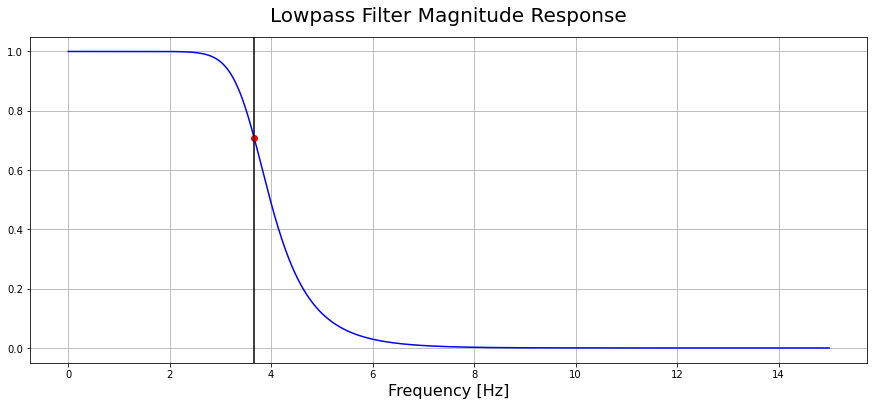

In [6]:
b, a = butterFilter(cutoff, fs, 'low', order)
w, h = freqz(b, a, worN=8000)

fig, ax = plt.subplots()
fig.set_size_inches(15, 6)
ax.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
ax.plot(cutoff, 0.5*np.sqrt(2), 'ro')
ax.axvline(cutoff, color='k')
plt.title("Lowpass Filter Magnitude Response", fontdict={'fontsize': 20}, pad=15.0)
plt.xlabel('Frequency [Hz]', fontdict={'fontsize': 16})
plt.grid()

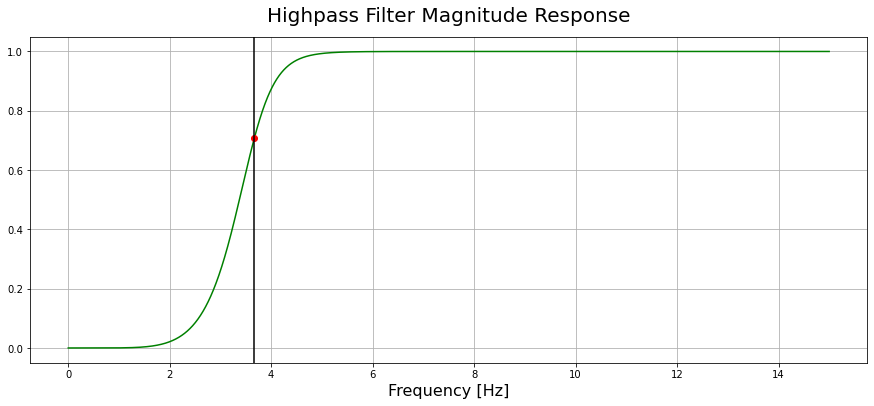

In [7]:
b, a = butterFilter(cutoff, fs, 'high', order)
w, h = freqz(b, a, worN=8000)
fig, ax = plt.subplots()
fig.set_size_inches(15, 6)
ax.plot(0.5*fs*w/np.pi, np.abs(h), 'g')
ax.plot(cutoff, 0.5*np.sqrt(2), 'ro')
ax.axvline(cutoff, color='k')
plt.title("Highpass Filter Magnitude Response", fontdict={'fontsize': 20}, pad=15.0)
plt.xlabel('Frequency [Hz]', fontdict={'fontsize': 16})
plt.grid()

<p style="font-size:20px">Plotting Phase Response of the Filter.</p>

/tmp/ipykernel_17809/188668799.py:8: RuntimeWarning: divide by zero encountered in log10
  ax.plot(0.5*fs*w/np.pi, np.log10(np.abs(phaseR)), 'b')


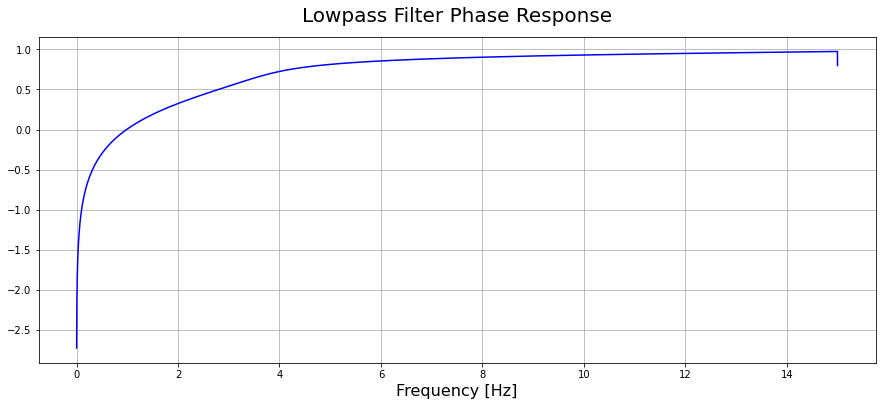

In [8]:
b, a = butterFilter(cutoff, fs, 'low', order)
w, h = freqz(b, a, worN=8000)

phaseR = unwrap(arctan2(imag(h),real(h)))

fig, ax = plt.subplots()
fig.set_size_inches(15, 6)
ax.plot(0.5*fs*w/np.pi, np.log10(np.abs(phaseR)), 'b')
# ax.plot(cutoff, 0.5*np.sqrt(2), 'ro')
# ax.axvline(cutoff, color='k')
plt.title("Lowpass Filter Phase Response", fontdict={'fontsize': 20}, pad=15.0)
plt.xlabel('Frequency [Hz]', fontdict={'fontsize': 16})
plt.grid()

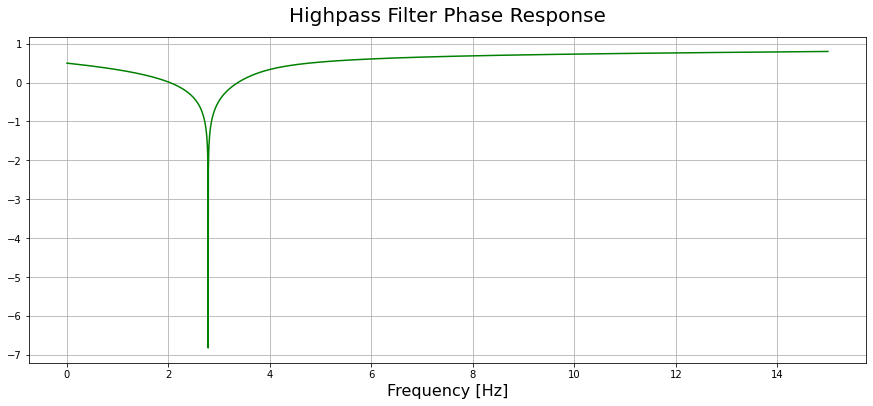

In [9]:
b, a = butterFilter(cutoff, fs, 'high', order)
w, h = freqz(b, a, worN=8000)
phaseR = unwrap(arctan2(imag(h),real(h)))

fig, ax = plt.subplots()
fig.set_size_inches(15, 6)
ax.plot(0.5*fs*w/np.pi, np.log10(np.abs(phaseR)), 'g')
# ax.plot(cutoff, 0.5*np.sqrt(2), 'ro')
# ax.axvline(cutoff, color='k')
plt.title("Highpass Filter Phase Response", fontdict={'fontsize': 20}, pad=15.0)
plt.xlabel('Frequency [Hz]', fontdict={'fontsize': 16})
plt.grid()